<a href="https://colab.research.google.com/github/HenryChen-nb/grandintegrator-Ajmal/blob/main/Flower_clustering_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering flowers

In this exercise we further practice clustering algorithms.

First, let's load some packages that we will need. We will use:


*   `pandas` for manipulating the data.
*   `matplotlib.pyplot` for visualizing the data.
*   `cluster` from `sklearn` which contains the clustering algorithms.
*   `StandardScaler` from `sklearn.preprocessing` for normalizing the data.





In [ ]:
### INSERT YOUR CODE HERE ###
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import cluster
from sklearn.preprocessing import StandardScaler

Next, let's load the raw data and store it in a dataframe.

In [ ]:
### INSERT YOUR CODE HERE ###
df = pd.read_csv('/flowers_width_length.csv')
print(df.head())
print(df.shape)
df=df[['Width','Length']]
print(df.head())
print(df.shape)

   Unnamed: 0     Width     Length
0           0  6.624385  13.632363
1           1  6.381172  13.786279
2           2  6.514470  10.464121
3           3  7.577816  12.101777
4           4  7.872765  12.142973
(1500, 3)
      Width     Length
0  6.624385  13.632363
1  6.381172  13.786279
2  6.514470  10.464121
3  7.577816  12.101777
4  7.872765  12.142973
(1500, 2)


We should also visualize the data to get a better understanding.

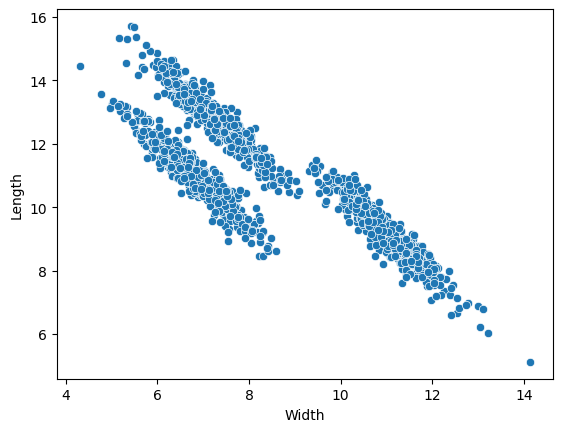

In [ ]:
### INSERT YOUR CODE HERE ###
sns.scatterplot(data=df, x='Width', y='Length')
plt.show()


As we learned in the lecture, we should (always) normalize the data. Good news is that we do not have to do that manually. There are functions available in `sklearn`, e.g., `StandardScaler`.

Find out how it works (and which scaling is used) at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.

In [ ]:
### INSERT YOUR CODE HERE ###
norm_data = StandardScaler().fit_transform(df)
print(norm_data)


df_norm = pd.DataFrame(norm_data, columns=['Width', 'Length'])
print(df_norm)


[[-0.86704776  1.51630725]
 [-0.9888373   1.60401212]
 [-0.92208781 -0.2890325 ]
 ...
 [ 1.41400552 -1.43252398]
 [ 0.57423744 -0.10773901]
 [ 1.38960406 -1.19759078]]
         Width    Length
0    -0.867048  1.516307
1    -0.988837  1.604012
2    -0.922088 -0.289033
3    -0.389614  0.644143
4    -0.241917  0.667617
...        ...       ...
1495 -0.391307 -0.704609
1496 -0.587637  1.268765
1497  1.414006 -1.432524
1498  0.574237 -0.107739
1499  1.389604 -1.197591

[1500 rows x 2 columns]


Let's visualize the scaled dataset.

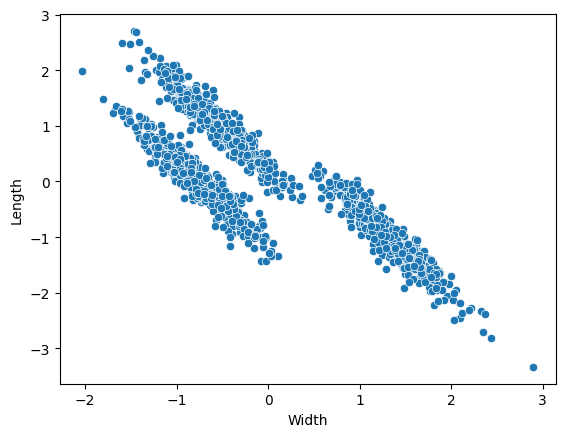

In [ ]:
### INSERT YOUR CODE HERE ###
sns.scatterplot(data=df_norm, x='Width', y='Length')
plt.show()

Now we're all set to cluster!

## K-means

Let's first create a copy of the dataset (optional but recommended).

In [ ]:
### INSERT YOUR CODE HERE ###
df_kmeans = df_norm.copy()

By looking at the original data, we might target to obtain three clusters. Let's apply K-means with $k=3$ and save the *cluster centers*, *inertia*, and *labels*.

In [ ]:
### INSERT YOUR CODE HERE ###
k=3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_kmeans)

#save the cluster cenrers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Width', 'Length'])
print(cluster_centers_df)

#save the cluster labels for each flower
labels = kmeans.labels_
print(labels)

[[ 1.33874655 -1.06015694]
 [-0.80663813  1.10892123]
 [-0.46685395 -0.10602532]]
      Width    Length
0  1.338747 -1.060157
1 -0.806638  1.108921
2 -0.466854 -0.106025
[1 1 2 ... 0 2 0]


Let's add the *labels* to the dataframe as a new column called *Cluster*.

In [ ]:
### INSERT YOUR CODE HERE ###
df_kmeans['Cluster'] = labels
print(df_kmeans.head())

      Width    Length  Cluster
0 -0.867048  1.516307        1
1 -0.988837  1.604012        1
2 -0.922088 -0.289033        2
3 -0.389614  0.644143        1
4 -0.241917  0.667617        1


Now we're ready to visualize the result. The observations are colored based on the *Cluster* label. Also, let's visualize the cluster center points (red marks).

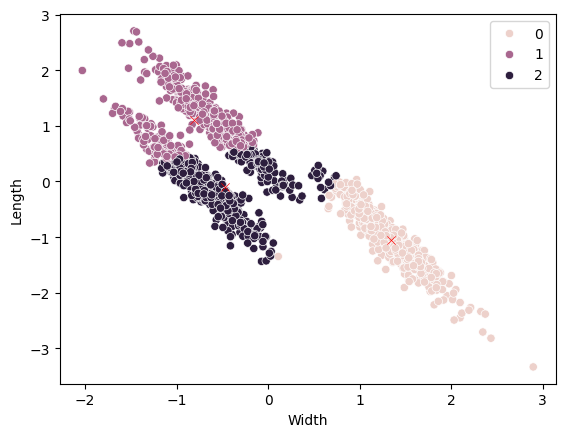

In [ ]:
### INSERT YOUR CODE HERE ###
sns.scatterplot(data=df_kmeans, x='Width', y='Length', hue='Cluster',)
sns.scatterplot(data=cluster_centers_df, x='Width', y='Length', marker='x',color='red')
plt.show()

That doesn't look right, or? What's the problem?

## DBSCAN

First let's create a copy of the normalized dataframe (optional but recommended).

In [ ]:
### INSERT YOUR CODE HERE ###
df_dbscan = df_norm.copy()

### DBSCAN 'out-of-the-box'

DBSCAN has several parameters that can be tuned (think size of neighborhood and MinPts, and distance metric). If these parameters are not explicitly defined, DBSCAN will use some default values. Those values might or might not work well for your dataset. Let's just try it out.

Note: More details can be found at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
### INSERT YOUR CODE HERE ###
eps=0.2
min_samples=8
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(df_dbscan)

#store the labels(cluster names of the points)
labels = dbscan.labels_
print(labels)
print(set(labels))


[0 0 1 ... 2 2 2]
{0, 1, 2, -1}


Next, let's add the label to our dataframe as a new column called 'Cluster'.

In [ ]:
### INSERT YOUR CODE HERE ###
df_dbscan['Cluster'] = labels

Now we're ready to visualize the clustering results.

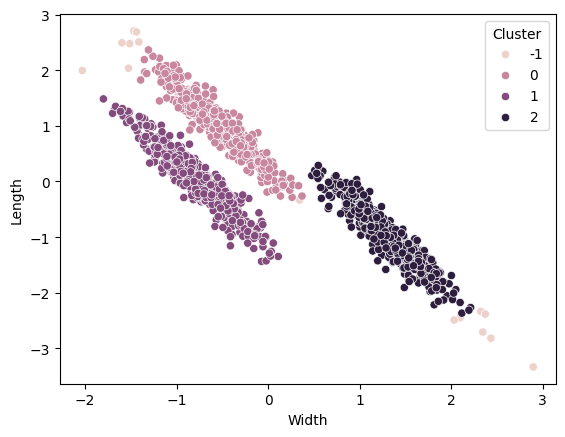

In [ ]:
### INSERT YOUR CODE HERE ###
sns.scatterplot(data=df_dbscan, x='Width', y='Length', hue='Cluster')
plt.show()

With the deault parameters, DBSCAN suggests to have one cluster. Also, we will have two outliers (noise points). That is not what we expected when seeing the data at first.

### DBSCAN with parameter tuning

Let's try to tweak the parameters of DBSCAN a bit to come up with a more satisfying result.

Let's create a new copy of the original data first.

In [ ]:
### INSERT YOUR CODE HERE ###

Next, we can try DBSCAN with various parameter settings.

In [ ]:
### INSERT YOUR CODE HERE ###

Next, let's add the label to our dataframe as a new column called 'Cluster'.

In [ ]:
### INSERT YOUR CODE HERE ###

Now we're ready to visualize the clustering results.

In [ ]:
### INSERT YOUR CODE HERE ###